In [1]:
import pandas as pd
import sentence_transformers
import umap
import numpy as np
import time


/Users/kevepaldeak/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/kevepaldeak/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Adatok beolvasása
data = pd.read_csv("https://storage.googleapis.com/superlinked-notebook-user-acquisiton-analytics/user_acquisiton_data.csv")

data['signup_date'] = pd.to_datetime(data['signup_date'], unit='s') 

data.head()

,id,signup_date,ad_creative,activity
0,0,2023-08-26 10:14:29,Join a dynamic gaming universe where every cha...,0.295882
1,1,2023-09-13 05:06:17,Join a thriving gaming community and challenge...,1.138306
2,2,2023-09-01 08:37:03,Experience the rush of competitive gaming! Joi...,0.005266
3,3,2023-08-29 12:46:43,Experience the rush of competitive gaming! Joi...,0.297846
4,4,2023-08-24 07:54:05,Join a dynamic gaming universe where every cha...,0.118947


In [3]:
print(data.dtypes)

type(data)

id                      int64
signup_date    datetime64[ns]
ad_creative            object
activity              float64
dtype: object


pandas.core.frame.DataFrame

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           8000 non-null   int64         
 1   signup_date  8000 non-null   datetime64[ns]
 2   ad_creative  8000 non-null   object        
 3   activity     8000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 250.1+ KB


In [5]:
pd.DataFrame(data["ad_creative"].value_counts())

,count
ad_creative,
Unleash your gaming potential! Upgrade to premium for 2 months free and dominate the competition with XYZCr$$d!,1785
Ready to level up? Join XYZCr$$d now for intense gaming battles and exclusive rewards!,1312
Embark on your gaming journey with XYZCr$$d! Join now and experience the thrill of competing against the finest players worldwide!,715
Join a dynamic gaming universe where every challenge pushes your skills to the limit! Connect with like-minded gamers and conquer the virtual realm together!,671
Step into the arena of endless possibilities! Join now to engage in exhilarating gaming competitions and forge friendships with fellow gamers along the way!,541
Calling all gamers! Don't miss out on your chance to excel. Join XYZCr$$d today for unparalleled gaming excitement and endless challenges!,533
Join a thriving gaming community and challenge your skills against formidable opponents!,501
Elevate your gaming experience! Upgrade now for 2 months free premium access and immerse yourself in the ultimate gaming community of XYZCr$$d!,501
Seeking thrilling gaming adventures? Join our community of gamers and embark on epic quests against worthy adversaries!,452


/Users/kevepaldeak/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


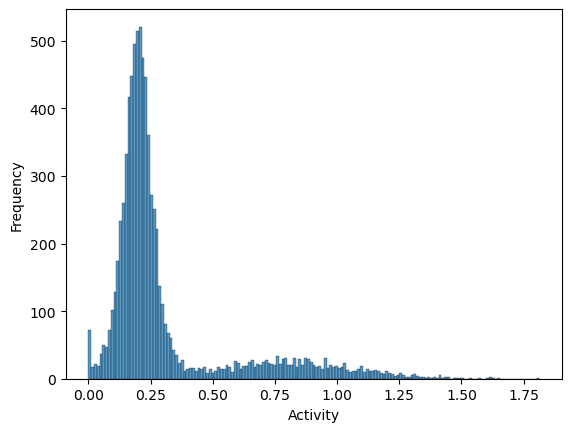

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.histplot(data['activity'])
plt.xlabel('Activity')
plt.ylabel('Frequency')
plt.show()


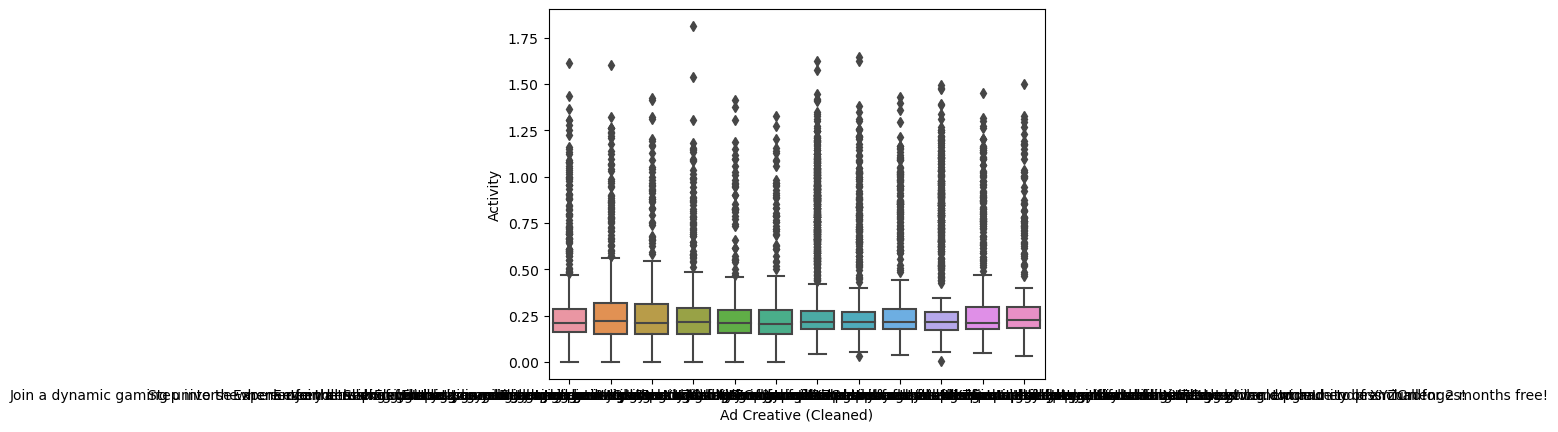

In [35]:
def clean_ad_creative(text):
    return text.replace("$", "")

data['clean_ad_creative'] = data['ad_creative'].apply(clean_ad_creative)

sns.boxplot(x="clean_ad_creative", y="activity", data=data)
plt.xlabel('Ad Creative (Cleaned)')
plt.ylabel('Activity')
plt.show()

/Users/kevepaldeak/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kevepaldeak/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


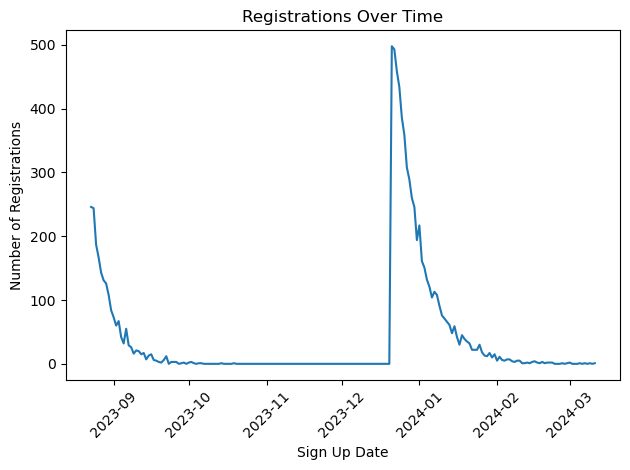

In [36]:
data_resampled = (
    data.groupby(pd.Grouper(key='signup_date', freq='D'))  # Group by day
    .size()  # Count registrations for each day
    .to_frame(name='count')  # Convert to DataFrame with 'count' column
    .reset_index()  # Reset index (no argument needed for recent pandas versions)
)

# 2. Create the area chart
sns.lineplot(x='signup_date', y='count', data=data_resampled)

# 3. Customize the plot (optional)
plt.xlabel('Sign Up Date')
plt.ylabel('Number of Registrations')
plt.title('Registrations Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [6]:
from sentence_transformers import SentenceTransformer
import umap.umap_ as umap


mpnet_model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
ad_embeddings = mpnet_model.encode(data['ad_creative'])
combined_embeddings = np.concatenate((ad_embeddings, data['activity'].to_numpy()[:, None]), axis=1)

combined_embeddings

array([[-0.00671572, -0.00457483, -0.03682003, ...,  0.0171035 ,
         0.0095398 ,  0.29588163],
       [ 0.0019592 ,  0.04254777, -0.03248355, ...,  0.04840171,
         0.00168882,  1.13830589],
       [-0.07537476,  0.02814919, -0.0125955 , ..., -0.03845286,
        -0.00497502,  0.00526575],
       ...,
       [-0.01888027,  0.10402516, -0.00417225, ..., -0.01010827,
         0.00954053,  0.32058201],
       [-0.01888027,  0.10402516, -0.00417225, ..., -0.01010827,
         0.00954053,  0.20716433],
       [-0.04830191,  0.0599936 , -0.01804072, ...,  0.01833877,
        -0.01065707,  0.16216098]])

In [7]:
umap_model = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=2)
umap_embeddings = umap_model.fit_transform(combined_embeddings)
umap_embeddings

array([[ -2.937593 ,  -4.719305 ],
       [-11.339521 ,  -7.8944964],
       [ -0.5743871,   6.414302 ],
       ...,
       [ 20.90321  ,   2.3128936],
       [ 12.678702 ,   1.4151099],
       [  3.4260924,   5.054189 ]], dtype=float32)

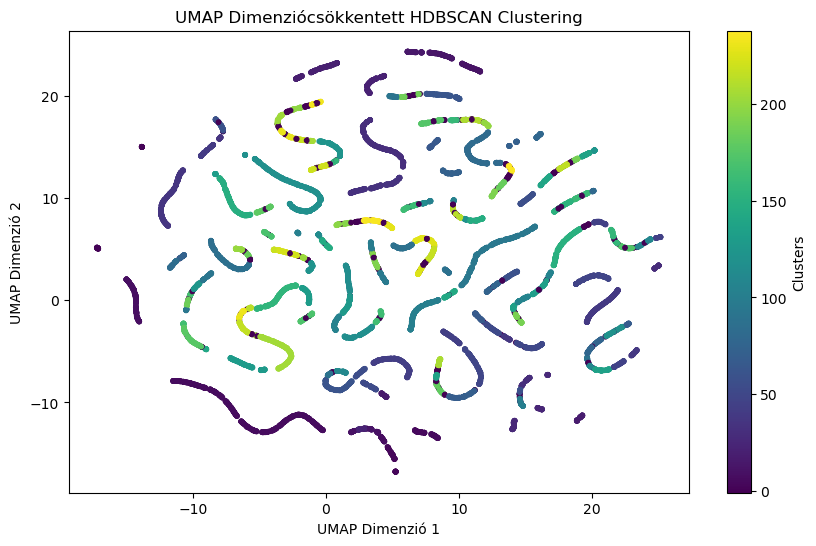

In [11]:
# HDBSCAN
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
cluster_labels = clusterer.fit_predict(umap_embeddings)

plt.figure(figsize=(10, 6))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.title('UMAP Dimenziócsökkentett HDBSCAN Clustering')
plt.xlabel('UMAP Dimenzió 1')
plt.ylabel('UMAP Dimenzió 2')
plt.colorbar(label='Clusters')
plt.show()

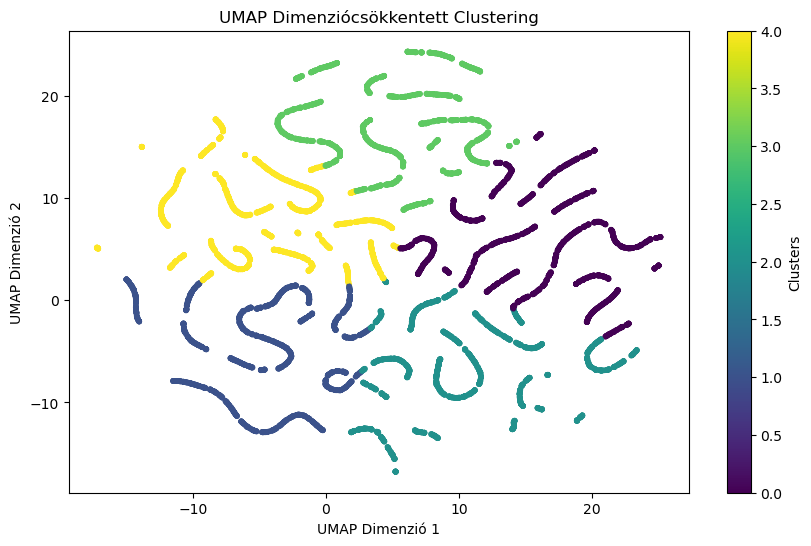

In [12]:
# K-means 
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(umap_embeddings)

plt.figure(figsize=(10, 6))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.title('UMAP Dimenziócsökkentett Clustering')
plt.xlabel('UMAP Dimenzió 1')
plt.ylabel('UMAP Dimenzió 2')
plt.colorbar(label='Clusters')
plt.show()